# Running Four Pre-Trained English Tokenizers (BERT, GPT-2, DistilBERT, XLNet) on Texts (News Articles + Blogs)
* Data from https://www.kaggle.com/patjob/articlescrape - contains 160,000 texts
* Further discussion needs to be done on:
  * which (out of the many) tokenizers to use
    * by some X number of most popular tokenizers? the downside of this is that if there are less known tokenizers that are better in one of the evaluation criteria, we won't find that
    * but, there are more tokenizers that we would be able to find and test (since some are not on huggingface as well)
  * how to use tokenization length vs dict size graphs for evaluation & what priority we should give these two critera vs the others (loss/accuracy/performance)
    * because noticed that the BERT and DistilBERT Tokenizers were relatively slower (~1 minute to run 5000 texts), as compared to XLNet (18 s) and GPT-2 (25 s)
  * whether we should run WordPiece/BPE/Sentencepiece tokenizers, since they are used to train the corresponding BERT/XLNet/GPT-2 tokenizers at hand

# Kaggle Configuration

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riybha216","key":"e9c44910ad89219b0d15fe1c4deaff3c"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-09-18 20:49:48          12707  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           7709  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3289  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2980  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [7]:
!kaggle datasets download -d patjob/articlescrape

 96% 143M/150M [00:01<00:00, 114MB/s] 
100% 150M/150M [00:01<00:00, 117MB/s]


In [8]:
!ls

articlescrape.zip  kaggle.json	sample_data


In [9]:
!unzip articlescrape.zip

Archive:  articlescrape.zip
  inflating: corpus.csv              


In [10]:
import chardet
with open("corpus.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'Windows-1252', 'language': ''}

In [9]:
import pandas as pd
import codecs

codecs.register_error("strict", codecs.ignore_errors)

data = pd.read_csv("corpus.csv")
data.head()

,Unnamed: 0,body,title,last_crawl_date,url
0,1,NEW DELHI: The Aam Aadmi Party's (AAP's) stanc...,GR Gopinath slams AAP's stand on FDI in retail...,2014-01-16,http://economictimes.indiatimes.com/news/polit...
1,2,Japans ties with India do not target any count...,Politics is now | The Indian Express,2014-01-16,http://indianexpress.com/article/opinion/colum...
2,3,SAGITTARIUS NOV 23-DEC 22. Its almost time to ...,Daily | Astrotype | The Indian Express,2014-01-16,http://indianexpress.com/astrotype/daily/
3,4,Bad corporate news sends stocks lower. Bad new...,Bad corporate news sends stocks lower - Jan. 1...,2014-01-16,http://money.cnn.com/2014/01/16/investing/stoc...
4,5,Related. 2008 Batla House encounter convict Sh...,Batla House encounter: HC denies bail to convi...,2014-01-16,http://indianexpress.com/article/india/india-o...


In [10]:
body = data["body"]
body.head()
# body.shape[0] # 160000

0    NEW DELHI: The Aam Aadmi Party's (AAP's) stanc...
1    Japans ties with India do not target any count...
2    SAGITTARIUS NOV 23-DEC 22. Its almost time to ...
3    Bad corporate news sends stocks lower. Bad new...
4    Related. 2008 Batla House encounter convict Sh...
Name: body, dtype: object

# Tokenizers

lists with final values: 

lent = total number of tokens for that text
distinct = distinct number of tokens for that text

* BERT: lent, distinct
* GPT-2: lent2, distinct2
* XLNet: lent3, distinct3
* DistilBERT: lent4, distinct4

right now, it only shows

In [31]:
pip install transformers

In [50]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [33]:
body[1]

'Japans ties with India do not target any country. They are solely intended to strengthen peace and stability in Asia. Its never too early for news TV to begin searching for the next prime minister. The next general elections are still three months away but TV news behaves as if theyre being held tomorrow. Its a case of back to the future, and the future is now. Thus, Times Now conducts live national debates on the weekend about issues for the elections and before the electorate. Watched Sitaram Yechury (CPM), Anand Sharma (Congress) and the BJPs Piyush Goel exchange barbs and accusations on your corruption versus mine, Sunday. Thus, CNN-IBN, Tuesday, began a new early evening show, A Billion Votes Battle for 2014. It deemed the initiative worthy of Rajdeep Sardesais presence along with late evening studio regulars like Vinod Mehta, Mani Shankar Aiyar and Tavleen Singh. Subject? Rahul Gandhi as PM nominee  too late or a gamechanger? And thus, writer Chetan Bhagat has decided that Decis

In [51]:
lent = [] #yes
total_length = []
dis = []
distinct = []
for i in range(5000):
    tok = tokenizer.tokenize(body[i])
    lent.append(len(tok))
    for x in tok:
      if x not in dis:
        dis.append(x)
    distinct.append(len(dis))
    dis.clear()

print(lent)
print(distinct)
  

[468, 987, 731, 523, 393, 676, 428, 320, 740, 801, 379, 409, 459, 1189, 458, 631, 752, 582, 819, 645, 881, 1178, 354, 336, 976, 1401, 740, 723, 1261, 503, 408, 1106, 618, 593, 654, 537, 765, 613, 850, 532, 746, 1024, 520, 357, 521, 535, 488, 391, 557, 527, 1173, 474, 588, 663, 982, 607, 1091, 350, 504, 527, 878, 646, 650, 442, 574, 367, 364, 413, 920, 516, 390, 657, 601, 852, 352, 399, 738, 1999, 1724, 895, 994, 495, 840, 867, 1325, 1591, 649, 1567, 648, 683, 463, 1029, 1107, 610, 1312, 1668, 386, 797, 958, 457, 970, 959, 646, 500, 945, 694, 455, 380, 320, 321, 398, 1286, 647, 515, 379, 478, 671, 828, 914, 567, 450, 1510, 640, 405, 471, 1246, 501, 1333, 1143, 367, 332, 332, 1049, 854, 750, 564, 690, 392, 339, 555, 344, 820, 375, 883, 399, 462, 354, 451, 393, 301, 309, 472, 650, 1376, 588, 1345, 1606, 619, 1111, 654, 590, 294, 663, 344, 1083, 388, 419, 584, 456, 427, 494, 423, 434, 696, 472, 2340, 523, 536, 669, 848, 427, 489, 815, 344, 535, 400, 955, 651, 548, 678, 866, 334, 370, 1620,

In [52]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

In [53]:
lent2 = [] #yes
total_length2 = []
dis2 = []
distinct2 = []
for i in range(5000):
    tok = tokenizer.tokenize(body[i])
    lent2.append(len(tok))
    for x in tok:
      if x not in dis2:
        dis2.append(x)
    distinct2.append(len(dis2))
    dis2.clear()

print(lent2)
print(distinct2)

[447, 976, 752, 507, 389, 667, 404, 313, 717, 778, 374, 394, 460, 1208, 456, 605, 744, 533, 797, 628, 875, 1120, 350, 325, 970, 1355, 641, 697, 1245, 501, 393, 1060, 597, 576, 637, 535, 758, 590, 836, 532, 725, 993, 487, 359, 509, 526, 494, 382, 548, 519, 1166, 478, 579, 639, 970, 599, 1074, 348, 487, 499, 852, 644, 643, 449, 568, 385, 360, 407, 900, 515, 381, 651, 596, 832, 350, 396, 720, 1899, 1682, 884, 969, 499, 817, 868, 1295, 1540, 631, 1570, 636, 676, 459, 1021, 1105, 601, 1309, 1666, 387, 791, 915, 441, 976, 947, 636, 486, 915, 686, 449, 379, 313, 318, 405, 1289, 649, 501, 389, 479, 666, 798, 870, 560, 449, 1477, 626, 399, 456, 1201, 495, 1261, 1141, 357, 332, 332, 1028, 825, 749, 552, 675, 382, 340, 555, 349, 822, 369, 880, 396, 439, 354, 458, 385, 303, 302, 481, 646, 1351, 599, 1327, 1617, 603, 1083, 640, 580, 292, 635, 346, 1107, 394, 417, 586, 459, 440, 491, 444, 439, 700, 478, 2334, 545, 559, 679, 873, 418, 486, 808, 349, 528, 388, 913, 644, 543, 683, 839, 334, 365, 1640, 

In [19]:
pip install sentencepiece

In [54]:
from transformers import XLNetTokenizer
tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")
tokenizer.tokenize("Don't you love 🤗 Transformers? We sure do.")

['▁Don',
 "'",
 't',
 '▁you',
 '▁love',
 '▁',
 '🤗',
 '▁',
 'Transform',
 'ers',
 '?',
 '▁We',
 '▁sure',
 '▁do',
 '.']

In [55]:
lent3 = [] #yes
total_length3 = []
dis3 = []
distinct3 = []
for i in range(5000):
    tok = tokenizer.tokenize(body[i])
    lent3.append(len(tok))
    for x in tok:
      if x not in dis3:
        dis3.append(x)
    distinct3.append(len(dis3))
    dis3.clear()

print(lent3)
print(distinct3)

[481, 1015, 771, 553, 398, 678, 441, 320, 760, 833, 384, 413, 482, 1211, 464, 616, 777, 594, 846, 666, 915, 1190, 370, 327, 982, 1399, 666, 667, 1268, 511, 416, 1162, 626, 609, 671, 557, 775, 634, 856, 547, 746, 1006, 549, 378, 535, 541, 505, 410, 575, 523, 1172, 502, 586, 674, 1008, 615, 1093, 357, 508, 515, 909, 657, 662, 461, 578, 383, 361, 417, 969, 535, 390, 676, 620, 869, 350, 404, 753, 2022, 1770, 902, 1014, 500, 817, 877, 1326, 1604, 669, 1646, 648, 703, 475, 1057, 1101, 610, 1341, 1693, 395, 824, 956, 480, 980, 980, 656, 518, 952, 717, 470, 391, 312, 323, 402, 1349, 676, 517, 390, 516, 683, 833, 921, 575, 448, 1542, 647, 414, 469, 1282, 506, 1318, 1164, 385, 336, 338, 1047, 858, 755, 572, 716, 392, 343, 574, 354, 829, 390, 894, 414, 461, 361, 478, 417, 313, 325, 496, 669, 1368, 601, 1346, 1656, 634, 1128, 662, 601, 302, 668, 361, 1146, 400, 418, 613, 477, 449, 488, 438, 434, 706, 476, 2436, 558, 548, 697, 896, 432, 498, 833, 349, 552, 402, 945, 655, 559, 696, 880, 340, 374, 16

In [56]:
from transformers import DistilBertTokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')

In [57]:
lent4 = [] #yes
total_length4 = []
dis4 = []
distinct4 = []
for i in range(5000):
    tok = tokenizer.tokenize(body[i])
    lent4.append(len(tok))
    for x in tok:
      if x not in dis4:
        dis4.append(x)
    distinct4.append(len(dis4))
    dis4.clear()

print(lent4)
print(distinct4)

[486, 1019, 799, 548, 397, 697, 446, 327, 762, 836, 383, 411, 480, 1229, 469, 617, 778, 604, 836, 658, 931, 1199, 372, 344, 999, 1434, 732, 729, 1294, 513, 420, 1168, 645, 610, 668, 554, 769, 633, 861, 554, 758, 1031, 534, 375, 542, 568, 508, 414, 574, 539, 1187, 503, 601, 673, 1005, 627, 1117, 361, 526, 536, 904, 663, 676, 465, 587, 376, 369, 433, 960, 523, 412, 668, 625, 884, 365, 408, 770, 2038, 1789, 915, 1021, 510, 860, 888, 1344, 1624, 668, 1639, 661, 713, 480, 1058, 1139, 621, 1355, 1721, 399, 815, 974, 471, 1009, 982, 653, 517, 964, 704, 474, 391, 329, 332, 405, 1321, 661, 529, 397, 506, 692, 858, 941, 575, 460, 1621, 659, 417, 490, 1294, 514, 1404, 1162, 381, 342, 342, 1073, 858, 764, 573, 704, 400, 361, 576, 359, 854, 395, 904, 422, 469, 368, 468, 406, 316, 322, 508, 661, 1405, 607, 1363, 1632, 645, 1129, 667, 606, 312, 698, 358, 1159, 403, 430, 608, 469, 459, 505, 440, 443, 705, 521, 2382, 542, 572, 708, 923, 434, 502, 847, 358, 551, 415, 975, 670, 566, 708, 899, 343, 382, 1

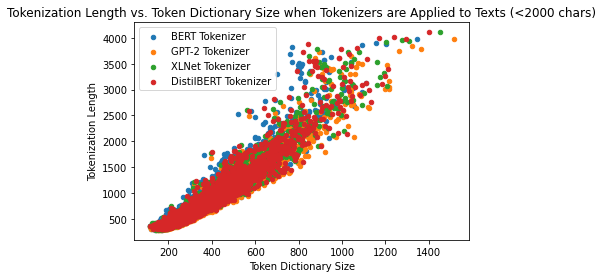

In [58]:
import matplotlib.pyplot as plt

x1 = distinct
y1 = lent

plt.scatter(x1, y1, label = 'BERT Tokenizer', s=20)

x2 = distinct2
y2 = lent2

plt.scatter(x2, y2, label = 'GPT-2 Tokenizer', s=20)

x3 = distinct3
y3 = lent3

plt.scatter(x3, y3, label = 'XLNet Tokenizer', s=20)

x4 = distinct4
y4 = lent4

plt.scatter(x4, y4, label = 'DistilBERT Tokenizer', s=20)

plt.xlabel('Token Dictionary Size')
plt.ylabel('Tokenization Length')
plt.title('Tokenization Length vs. Token Dictionary Size when Tokenizers are Applied to Texts (<2000 chars)')
plt.legend()
plt.show()

# Stats

In [59]:
import statsmodels.api as sm
from scipy import stats

X = distinct2
y = lent2

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
print(est.fit().f_pvalue)
est2 = est.fit()

print(est2.summary())

0.0
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 6.396e+04
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:12:51   Log-Likelihood:                -31227.
No. Observations:                5000   AIC:                         6.246e+04
Df Residuals:                    4998   BIC:                         6.247e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -200.5555      4.087    -49.069     

In [26]:
from scipy.stats import sem

# mean
for i in range(len(lent)):
  mean = sum(lent) / len(lent)
print(mean)
# computes standard error
sem(lent)

366.2287066246057


1.1719304393021661

In [ ]:
l=[]
for i in range(5000):
  l.append(len(body[i]))

l

In [61]:
import pandas as pd
 
# initialise data of lists.
data = {'BERT Total':lent,
        'BERT Distinct':distinct,
        'GPT2 Total':lent2,
        'GPT2 Distinct':distinct2,
        'XLNet Total':lent3,
        'XLNet Distinct':distinct3,
        'DistilBERT Total':lent4,
        'DistilBERT Distinct':distinct4,
        'Text Total Chars': l}
 
# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
df.to_csv("tokenizer-data.csv")